<a href="https://colab.research.google.com/github/jp0502/Temp/blob/main/Credit_Card_Fraud_Detection_with_knn_classifier_and_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict if credit card usage is fraud or not using KNN

In this notebook, we explore the credit card fraud dataset from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The purpose of this notebook is to use the k-nearest neighbour classfier algorithm to identify fraudulent use of credit cards based on 28 different variables with 280,000 points of data.



Let's first import all the libraries we need. We will be using methods inside the scikit-learn library.

In [ ]:
import numpy as np #linear algebra
import pandas as pd #dataframe manipulation
import csv #excel file
from sklearn.model_selection import train_test_split #split train data
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance.
from sklearn.neighbors import KNeighborsClassifier # Classifier implementing the k-nearest neighbors vote.
from sklearn.metrics import confusion_matrix #testing for false positive and negative
from sklearn.metrics import f1_score #Compute the F1 score, also known as balanced F-score or F-measure.
from sklearn.metrics import accuracy_score #The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

Here we'll be importing the csv file from the Kaggle notebook.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Now, to train our model, we must prepare the training and the testing sets to fit the model. We randomly select 80% and 20% of the data for training and testing sets, respectively.

In [ ]:
#Define x train, x test, y train, y test
X = df.iloc[:,0:30]
y = df.iloc[:,30]
# random_state = 0:
##  Passes an int for reproducible output across multiple function calls.
# test_size = 0.2:
##   should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

Now, notice that in our data, the numerical values in V1 to V27 are very low compared to the values in "Amount" column. This can cause problems in the training of the model because the model can interpret the low values of columns 1 to 28 as an insignificant variable.

To prevent this, we normalize our data. This means that we standardize the values so the units become "x number of standard deviations from the mean".

In [ ]:
#normalize data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Now we define our k nearest neighbour algorithm. There is no standard set number of neighbours; so we use k = 11.

The way that the knn classifier works, is that for every point on the data, it calculates the Euclidean distance between each point and its 11 neighbouring points.

In [ ]:
# 11 neighbours for each point, p = 2 sets calculation of each point to the neighbours to use euclidean distance.
classifier = KNeighborsClassifier(n_neighbors = 11, p =2, metric = 'euclidean')
classifier.fit(X_train, y_train)
classifier.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

Now, since our prediction data is binary (is fraud, is not fraud), we could try to create a confusion matrix to test for false positive/negatives and true positive/negatives.

However, because our data is so heavily imbalanaced (284,807 transactions, 492 frauds), it is difficult for the KNN classifier to set a proper threshold for classifying a data point as fraud; therefore a confusion matrix is not useful.

Instead, we use the Precision-Recall Area Under the Curve (PRAUC).

Precision is simply the proportion of positive results that were correctly classified. **It is useful because Precision doesant use the number of True Negatievs in its calculation; thus not affected by the distribution imbalance.**

$Precision = \frac{True Positives}{True Positives + False Positives}$

And Recall is the proportion of correct positive classifications out of all positive predictions (whether they were correct or not).

$Recall = \frac{True Positives}{True Positives + False Negatives}$

So, let's plot the PRAUC. First we need to import a couple more libraries.

In [ ]:
|from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt

Here, we define y_scores with the predict_proba function on X_test testing set dataframe to assign a likelihood percentage of belong in either class (not fraud = 0, fraud = 1). Let's see what the first element of y_score looks like.

In [ ]:
y_scores = classifier.predict_proba(X_test)


In [ ]:
for index, x in enumerate(y_scores):
  if (x[1] != 0) and (x[1] != 1):
    print(index,x)

67 [0.90909091 0.09090909]
159 [0.18181818 0.81818182]
365 [0.09090909 0.90909091]
1088 [0.90909091 0.09090909]
1241 [0.90909091 0.09090909]
1795 [0.90909091 0.09090909]
1976 [0.90909091 0.09090909]
3371 [0.90909091 0.09090909]
3682 [0.90909091 0.09090909]
4608 [0.81818182 0.18181818]
5286 [0.63636364 0.36363636]
6122 [0.36363636 0.63636364]
6893 [0.18181818 0.81818182]
6940 [0.18181818 0.81818182]
7418 [0.90909091 0.09090909]
7496 [0.45454545 0.54545455]
7924 [0.90909091 0.09090909]
8072 [0.18181818 0.81818182]
8139 [0.36363636 0.63636364]
8227 [0.09090909 0.90909091]
8297 [0.90909091 0.09090909]
8374 [0.09090909 0.90909091]
8754 [0.90909091 0.09090909]
8834 [0.90909091 0.09090909]
8914 [0.90909091 0.09090909]
9062 [0.54545455 0.45454545]
9126 [0.90909091 0.09090909]
9140 [0.18181818 0.81818182]
9270 [0.90909091 0.09090909]
9335 [0.90909091 0.09090909]
9365 [0.90909091 0.09090909]
9459 [0.90909091 0.09090909]
9744 [0.09090909 0.90909091]
9757 [0.18181818 0.81818182]
9825 [0.90909091 0

Above we print out all the data points that aren't [0,1] or [1,0]; meaning we only want to see the points that the KNN classifier wasn't 100% sure whether if it was a fraud or not. As we can see that both values in each output adds upto 1, and each values are percentages of each point belonging to either classes.

Now we move on to determining false/true positive rates of the y_test testing set. The y_scores[:,1] are the values of the likelihood of the sample being a fraud that was obtained from the predict_proba method, imposed on the y_test set.

This returns the false positive rate, true positive rate, and the decreasing threshold that is used to calculate fpr and tpr.


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

Finally, let's see what this graph looks like.

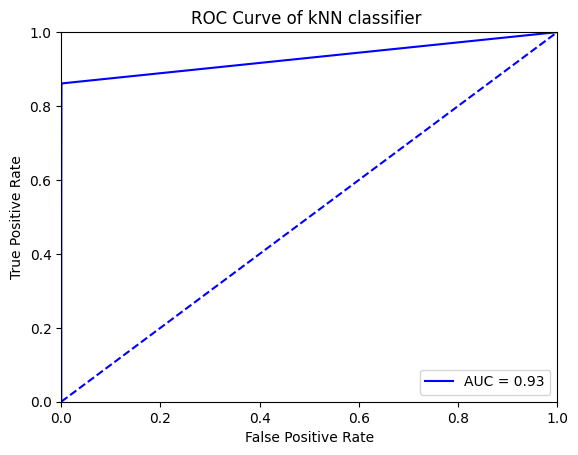

In [ ]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN classifier ')
plt.show()

We see above that the threshold can sit around 0 FPR and still achieve a TRP of approximately 0.85. Depending on how much FPR we are comfortable with, we may accept thresholds slightly past the (0.0,0.85) point. However, the AUC of 0.93 is a fairly acceptable result.
